In [1]:
import matplotlib.pyplot as plt
import numpy as np
from subprocess import call , check_output , STDOUT
from os import path
%matplotlib inline

%cd /mnt/mint/home/steffenpl/Projects/motor/gsSandbox/results
binPath = "/mnt/mint/home/steffenpl/Projects/motor/gsSandbox-build/bin"


def genParam( args ):
    print( check_output( binPath + "/genParam " + args , shell=True,universal_newlines=True) )

def optParam( args ):
    print( check_output( binPath + "/optParam " + args , shell=True,universal_newlines=True) )
    
def testParam( args ):
    print( check_output( binPath + "/testParam " + args , shell=True,universal_newlines=True) )

/mnt/mint/home/steffenpl/Projects/motor/gsSandbox/results


In [2]:
# Create surfaces
def generateParameterizations( names , argList ):
    outputNames = []
    for inputName in names:
        fileName = inputName[0]
        name = inputName[1]
        for arg in argList:
            newParam = not path.exists( "%s-%s" % (name,arg[1]) ) or arg[2] == True or inputName[2]
            if newParam:
                strArgs =  "-i %s -o %s-%s %s" %( fileName , name , arg[1] , arg[0] )
                print( "genParam " + strArgs)
                genParam( strArgs )
            outputNames.append( [name + "-" + arg[1] , newParam ] )
    return outputNames

# Optimize surfaces
def optimizeParameterizations( names , argList ):
    outputNames = []
    for inputName in names:
        name = inputName[0]
        for arg in argList:
            newParam = not path.exists( "%s-%s" % (name,arg[1]) ) or arg[2] == True or inputName[1]
            if newParam:
                strArgs =  "-i %s/%s.xml -o %s-%s %s" %( name , name , name , arg[1] , arg[0] )
                print( "optParam " + strArgs )
                optParam( strArgs )
            outputNames.append( [ name + "-" + arg[1] , newParam ] )
    return outputNames

# Test parameterizations
def testParameterizations( names , argList ):
    outputNames = []
    for inputName in names:
        name = inputName[0]
        for arg in argList:
            newParam = not path.exists( "%s-%s" % (name,arg[1]) ) or arg[2] == True or inputName[1]
            if newParam:
                strArgs = "-i %s/%s.xml -o %s-%s %s" % ( name , name , name , arg[1] , arg[0] )
                print("testParam " + strArgs )
                testParam( strArgs )
            outputNames.append( [name + "-" + arg[1],newParam ] )
    return outputNames

# Plot convergence plots
def estimateOrder( steps , errors ):
    errors = np.log( errors ).reshape( (-1,1))
    n = errors.shape[0]
    A = np.matrix( [ np.ones(n) , np.log( steps ) ] ).T    
    x = np.linalg.solve( A.T * A , A.T * errors )
    return x[1]

def plotErrors( fileNames ):
    for fileName in fileNames:
        name = path.basename( fileName[0] )
        errors = np.loadtxt( fname= name + "/" + name + '_error.csv' , skiprows=1 , delimiter=',')
        steps = 2**( -errors[:,0] - 4 )
        degree = errors[:,1]


        plt.loglog( steps , errors[:,2] , label='L_1')
        plt.loglog( steps , errors[:,3] , label='L_2' )
        plt.loglog( steps , errors[:,4] , label='L_\inf' )
        #plt.loglog( steps , steps**2 , label='second order' )
        plt.legend( loc = 'best')
        plt.title( name )
        plt.show()

        print( "Error estimate %s: L_1: %.2f" % (name,estimateOrder(steps,errors[:,2])) )
        print( "Error estimate %s: L_2: %.2f" % (name,estimateOrder(steps,errors[:,3])) )
        print( "Error estimate %s: max: %.2f" % (name,estimateOrder(steps,errors[:,4])) )


In [ ]:
# Skip generation
files = [
    [ "tudoMale2D" , False ],
]

#genArgList = [
#    ["-a min -n 8 -m 8","min-88",False],
#    ["-a bil -n 8 -m 8","bil-88",False],
#];

optArgList = [
    ["","no-opt",False],
    ["-f winslow --forcePositiveDet" , "winslow",False],
    ["-f liao --forcePositiveDet" , "liao",False],
    #["-f liao" , "liao-no-det",True],
    ["-f contMechanics --forcePositiveDet" , "contMechanics",False],
]

testArgList = [
    ["-k 7 --exact \"sin(x) + cos(y)\" --rhs \"sin(x) + cos(y)\"" , "k7-sin+cos" , False],
]

optFiles  = optimizeParameterizations( files , optArgList )
testFiles = testParameterizations( optFiles , testArgList )
plotErrors( testFiles )

testParam -i tudoMale2D-no-opt/tudoMale2D-no-opt.xml -o tudoMale2D-no-opt-k7-sin+cos -k 7 --exact "sin(x) + cos(y)" --rhs "sin(x) + cos(y)"


In [3]:
# Main
files = [
    ["../data/test/cube.xml" , "cube" , False ],
    #["../data/UBW/turbineBoundary.xml" , "turbine" , False ]
]

genArgList = [
    ["-a min -n 8 -m 8","min-88",False],
    ["-a bil -n 8 -m 8","bil-88",False],
];

optArgList = [
    ["","no-opt",False],
    ["-f winslow --forcePositiveDet" , "winslow",False],
    ["-f liao --forcePositiveDet" , "liao",False],
    ["-f liao --forcePositiveDet -q gauss2" , "liao-gauss2",False],
    ["-f contMechanics --forcePositiveDet" , "contMechanics",False],
]

testArgList = [
    ["-k 5 --exact \"sin(x) + cos(y)\" --rhs \"sin(x) + cos(y)\"" , "k5-sin+cos" , False],
]

genFiles  = generateParameterizations( files , genArgList )
optFiles  = optimizeParameterizations( genFiles , optArgList )
testFiles = testParameterizations( optFiles , testArgList )
plotErrors( testFiles )

optParam -i cube-min-88/cube-min-88.xml -o cube-min-88-liao-gauss2 -f liao --forcePositiveDet -q gauss2

List of user-set options:

                                    Name   Value                used
                   hessian_approximation = limited-memory        yes
                                max_iter = 300                   yes
                             mu_strategy = adaptive              yes
                             print_level = 5                     yes
                      print_user_options = yes                   yes
                                     tol = 1e-08                 yes

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
*****************************************************************************

CalledProcessError: Command '/mnt/mint/home/steffenpl/Projects/motor/gsSandbox-build/bin/testParam -i cube-min-88-winslow/cube-min-88-winslow.xml -o cube-min-88-winslow-k5-sin+cos -k 5 --exact "sin(x) + cos(y)" --rhs "sin(x) + cos(y)"' returned non-zero exit status 255

In [5]:
# Main
files = [
    ["../data/test/horseshoe.xml" , "horseshoe" , False ],
]

genArgList = [
    ["-a min -n 4 -m 4","min-44",False],
    ["-a bil -n 4 -m 4","bil-44",False],
    ["-a min -n 8 -m 8","min-88",False],
    ["-a bil -n 8 -m 8","bil-88",False],
    ["-a min -n 16 -m 16","min-16",False],
    ["-a bil -n 16 -m 16","bil-16",False],
    ["-a min -n 32 -m 32","min-32",False],
    ["-a bil -n 32 -m 32","bil-32",False],
    ["-a min -n 64 -m 64","min-64",False],
    ["-a bil -n 64 -m 64","bil-64",False],
];

optArgList = [
    ["","no-opt",False],
    #["-f winslow --forcePositiveDet" , "winslow",False],
    #["-f liao --forcePositiveDet" , "liao",True],
    #["-f contMechanics --forcePositiveDet" , "contMechanics",False],
]

testArgList = [
    ["-k 5 --exact \"sin(x) + cos(y)\" --rhs \"sin(x) + cos(y)\"" , "k5-sin+cos" , False],
]

genFiles  = generateParameterizations( files , genArgList )
optFiles  = optimizeParameterizations( genFiles , optArgList )
#testFiles = testParameterizations( optFiles , testArgList )
#plotErrors( testFiles )

genParam -i ../data/test/horseshoe.xml -o horseshoe-min-32 -a min -n 32 -m 32
----------------------

n: 32

m: 32

degree: 3

input: ../data/test/horseshoe.xml

output: horseshoe-min-32

----------------------

[ 0 0 0.12 0.25 ... 0.75 0.82 1 1 ] (deg=1, size=11, minSpan=0.07, maxSpan=0.18)
Writing the surface (with determinate coordinate) to a paraview file: horseshoe-min-32/horseshoe-min-32Det.vts


genParam -i ../data/test/horseshoe.xml -o horseshoe-bil-32 -a bil -n 32 -m 32
----------------------

n: 32

m: 32

degree: 3

input: ../data/test/horseshoe.xml

output: horseshoe-bil-32

----------------------

[ 0 0 0.12 0.25 ... 0.75 0.82 1 1 ] (deg=1, size=11, minSpan=0.07, maxSpan=0.18)
Writing the surface (with determinate coordinate) to a paraview file: horseshoe-bil-32/horseshoe-bil-32Det.vts


genParam -i ../data/test/horseshoe.xml -o horseshoe-min-64 -a min -n 64 -m 64
----------------------

n: 64

m: 64

degree: 3

input: ../data/test/horseshoe.xml

output: horseshoe-min-64



genParam -i ../data/test/cube.xml -o cube-min-44 -a min -n 4 -m 4
----------------------

n: 4

m: 4

degree: 3

input: ../data/test/cube.xml

output: cube-min-44

----------------------

[ 0 0 0.25 0.5 0.75 1 1 ] (deg=1, size=7, minSpan=0.25, maxSpan=0.25)

optParam -i cube-min-44/cube-min-44.xml -o cube-min-44-no-opt 
No functional given (-f).

optParam -i cube-min-44/cube-min-44.xml -o cube-min-44-winslow -f winslow --forcePositiveDet -v 5

List of user-set options:

                                    Name   Value                used
                   hessian_approximation = limited-memory        yes
                                max_iter = 300                   yes
                             mu_strategy = adaptive              yes
                             print_level = 5                     yes
                      print_user_options = yes                   yes
                                     tol = 1e-08                 yes

*****************************************

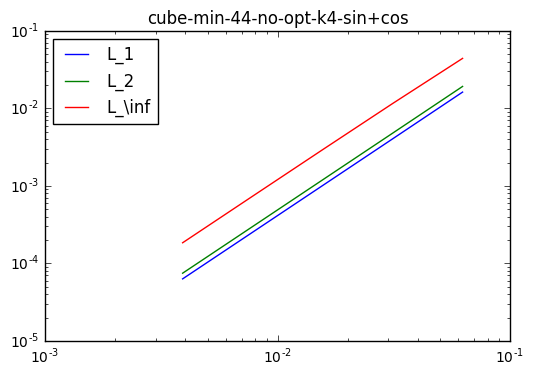

Error estimate cube-min-44-no-opt-k4-sin+cos: L_1: 2.00
Error estimate cube-min-44-no-opt-k4-sin+cos: L_2: 2.00
Error estimate cube-min-44-no-opt-k4-sin+cos: max: 1.98


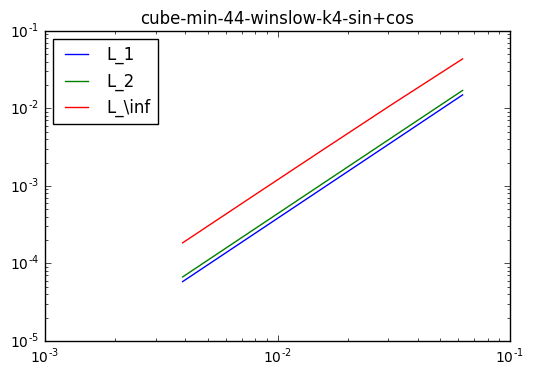

Error estimate cube-min-44-winslow-k4-sin+cos: L_1: 2.00
Error estimate cube-min-44-winslow-k4-sin+cos: L_2: 2.00
Error estimate cube-min-44-winslow-k4-sin+cos: max: 1.97


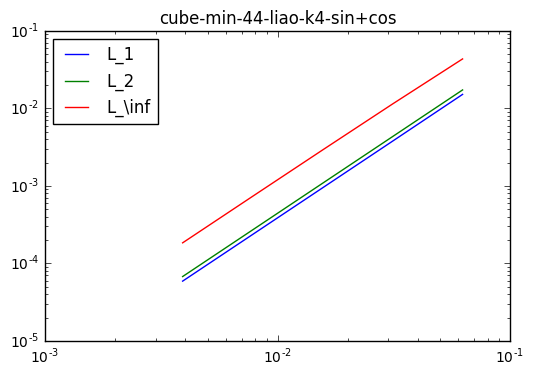

Error estimate cube-min-44-liao-k4-sin+cos: L_1: 2.00
Error estimate cube-min-44-liao-k4-sin+cos: L_2: 2.00
Error estimate cube-min-44-liao-k4-sin+cos: max: 1.97


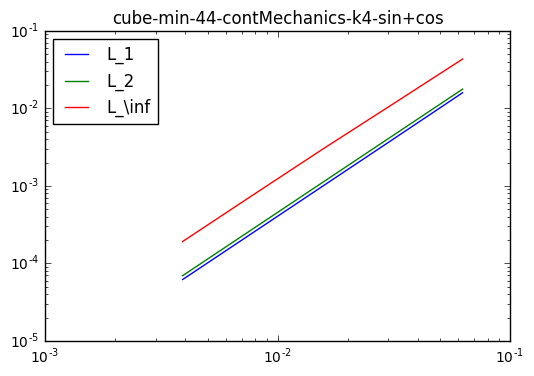

Error estimate cube-min-44-contMechanics-k4-sin+cos: L_1: 2.00
Error estimate cube-min-44-contMechanics-k4-sin+cos: L_2: 2.00
Error estimate cube-min-44-contMechanics-k4-sin+cos: max: 1.95


In [10]:
# Main
files = [
    ["../data/test/cube.xml" , "cube" , True ],
]

genArgList = [
    ["-a min -n 4 -m 4","min-44",False],
];

optArgList = [
    ["","no-opt",False],
    ["-f winslow --forcePositiveDet -v 5" , "winslow",False],
    ["-f liao --forcePositiveDet " , "liao",False],
    ["-f contMechanics --forcePositiveDet " , "contMechanics",False],
]

testArgList = [
    ["-k 4 --exact \"sin(x) + cos(y)\" --rhs \"sin(x) + cos(y)\"" , "k4-sin+cos" , False],
]

genFiles  = generateParameterizations( files , genArgList )
optFiles  = optimizeParameterizations( genFiles , optArgList )
testFiles = testParameterizations( optFiles , testArgList )
plotErrors( testFiles )

In [ ]:
# Main
files = [
    ["../data/test/cube.xml" , "cube" , False ],
    ["../data/UBW/turbineBoundary.xml" , "turbine" , False ],
]

genArgList = [
    ["-a min -n 8 -m 8","min-88",False],
    ["-a bil -n 8 -m 8","bil-88",False],
];

optArgList = [
    #["","no-opt",False],
    #["-f winslow --forcePositiveDet" , "winslow",False],
    ["-f liao --forcePositiveDet" , "liao",False],
    ["-f liao --forcePositiveDet -q gauss2" , "liao-gauss2",False],
    #["-f contMechanics --forcePositiveDet" , "contMechanics",False],
]

testArgList = [
    ["-k 5 --exact \"sin(x) + cos(y)\" --rhs \"sin(x) + cos(y)\"" , "k5-sin+cos" , False],
]

genFiles  = generateParameterizations( files , genArgList )
optFiles  = optimizeParameterizations( genFiles , optArgList )
#testFiles = testParameterizations( optFiles , testArgList )
#plotErrors( testFiles )

genParam -i ../data/test/cube.xml -o cube-polar-4 -a naivePolar -n 4
----------------------

n: 4

m: 8

degree: 3

input: ../data/test/cube.xml

output: cube-polar-4

----------------------

[ 0 0 0.25 0.5 0.75 1 1 ] (deg=1, size=7, minSpan=0.25, maxSpan=0.25)
Writing the surface (with determinate coordinate) to a paraview file: cube-polar-4/cube-polar-4Det.vts


optParam -i cube-polar-4/cube-polar-4.xml -o cube-polar-4-no-opt 
No functional given (-f).

optParam -i cube-polar-4/cube-polar-4.xml -o cube-polar-4-winslow -f winslow --forcePositiveDet --polar

List of user-set options:

                                    Name   Value                used
                   hessian_approximation = limited-memory        yes
                                max_iter = 300                   yes
                             mu_strategy = adaptive              yes
                             print_level = 5                     yes
                      print_user_options = yes                 

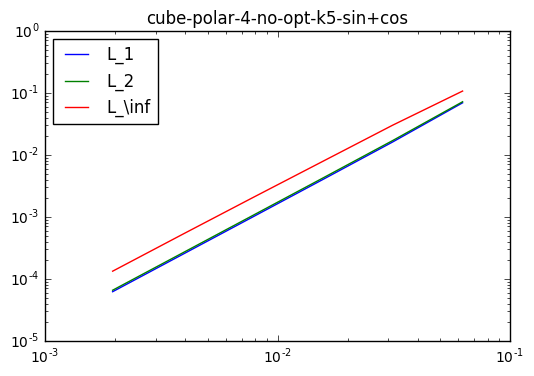

Error estimate cube-polar-4-no-opt-k5-sin+cos: L_1: 2.02
Error estimate cube-polar-4-no-opt-k5-sin+cos: L_2: 2.02
Error estimate cube-polar-4-no-opt-k5-sin+cos: max: 1.94


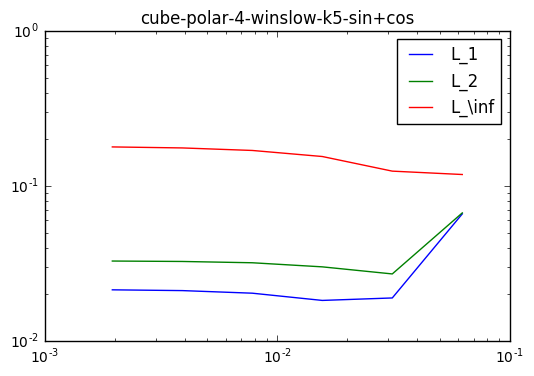

Error estimate cube-polar-4-winslow-k5-sin+cos: L_1: 0.21
Error estimate cube-polar-4-winslow-k5-sin+cos: L_2: 0.12
Error estimate cube-polar-4-winslow-k5-sin+cos: max: -0.13


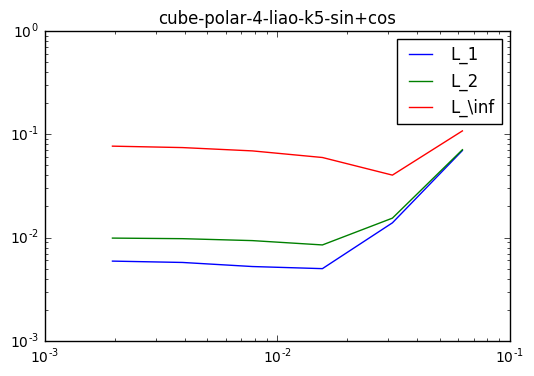

Error estimate cube-polar-4-liao-k5-sin+cos: L_1: 0.62
Error estimate cube-polar-4-liao-k5-sin+cos: L_2: 0.46
Error estimate cube-polar-4-liao-k5-sin+cos: max: -0.01


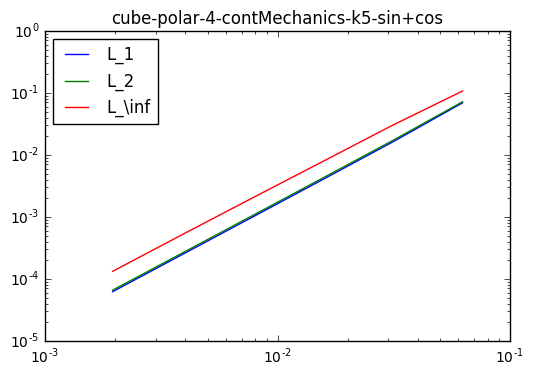

Error estimate cube-polar-4-contMechanics-k5-sin+cos: L_1: 2.02
Error estimate cube-polar-4-contMechanics-k5-sin+cos: L_2: 2.02
Error estimate cube-polar-4-contMechanics-k5-sin+cos: max: 1.94


In [7]:
# Polar
files = [
    ["../data/test/cube.xml" , "cube" , True ],
    #["../data/UBW/turbineBoundary.xml" , "turbine" , False ]
]

genArgList = [
    ["-a naivePolar -n 4","polar-4",False],
];

optArgList = [
    ["","no-opt",False],
    ["-f winslow --forcePositiveDet --polar" , "winslow",False],
    ["-f liao --forcePositiveDet --polar" , "liao",True],
    ["-f contMechanics --forcePositiveDet --polar" , "contMechanics",False],
]

testArgList = [
    ["-k 5 --polar --exact \"sin(x) + cos(y)\" --rhs \"sin(x) + cos(y)\"" , "k5-sin+cos" , False],
]

genFiles  = generateParameterizations( files , genArgList )
optFiles  = optimizeParameterizations( genFiles , optArgList )
testFiles = testParameterizations( optFiles , testArgList )
plotErrors( testFiles )